
Evolutia maximului: 

[2.249161380745756, 2.2442758697913106, 2.248193129363848, 2.249658262385142, 2.2442159711479124, 2.2447425906940115, 2.2498877971987965, 2.247388238883713, 2.2455313215293566, 2.249508567185405, 2.249358840273164, 2.2468176195677647, 2.2496625329924242, 2.249972268489678, 2.2499459201016005, 2.2435848367592524, 2.2239687386197446, 2.2497760505189675, 2.249031608062426, 2.243612419966374, 2.2454972134433797, 2.247837630031681, 2.2278517327930922, 2.2447915374722247, 2.2473474333142125, 2.244623366316505, 2.247713910404209, 2.229845717102614, 2.2351217276244464, 2.2415937807936235, 2.247191822783012, 2.222227308253625, 2.2137821314807007, 2.2492619039720783, 2.249613376556028, 2.237912209340949, 2.2449474830177776, 2.2471880312029526, 2.2499099871162493, 2.2458085989219247, 2.244474450035573, 2.2499587864324453, 2.2462271322761267, 2.2325861634826607, 2.0981007162282794, 2.249975576036085, 2.249982935165383, 2.2495418520600494, 2.2499592899812484, 2.23747742984010

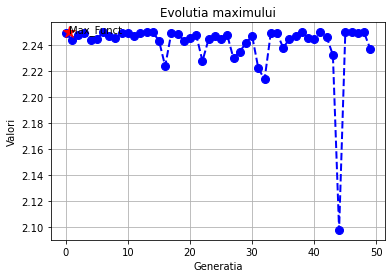

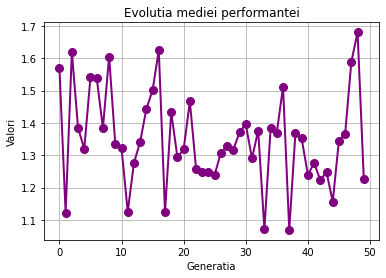

In [8]:
import matplotlib.pyplot as plt
import math as m
import numpy as np


with open("date.txt", "r") as fin:   # citire din fisier

    rand = [int(x) for x in fin.readline().split()]

    dimensiune_populatie = rand[0]
    precizie = rand[1]
    etape = rand[2]
    a_lim_inf = rand[3]
    b_lim_sup = rand[4]

    rand = [float(x) for x in fin.readline().split()]

    prob_crossover = rand[0]
    prob_mutatie = rand[1]


def my_func(x):
    return -x ** 2 + x + 2


def lungime_crom():
    var = (b_lim_sup - a_lim_inf) * (10 ** precizie) # formula discretizare interval
    minim = m.log(var, 2)
    return int(minim) + 1


def transform_binar_interval(x, lung_crm): 
    var = int(x, 2)
    interval_nr = (var / (2 ** lung_crm - 1)) * (b_lim_sup - a_lim_inf) + a_lim_inf  
    # valoarea codificata din D = [a,b] - translatie liniara
    return interval_nr


pop_baza_binar = []
pop_baza_decimal = []
def generare_random(lungime_crm):   
    # se genereaza aleator cromozomii (populatia initiala)

    for _ in range(dimensiune_populatie):
        crm_bit = np.random.randint(2, size = lungime_crm)
        pop_baza_binar.append(list(crm_bit))

    for elem in pop_baza_binar:
        new_list = "".join(str(x) for x in elem)
        pop_baza_decimal.append(transform_binar_interval(new_list, lungime_crm))


f =[]
def val_my_func(): 
    # returnez performanta totala prin sum
    sum = 0
    for elem in pop_baza_decimal:
        valoare_fct = my_func(elem)
        f.append(valoare_fct)
        sum = sum + valoare_fct     
    return sum

prob = []
def asociere_prob(FF):
    # asociez fiecarui individ X i,  o probabilitate P i  de a fi selectat 
    # in functie de Performanta acestuia (data de func fitness)
    for i in range(dimensiune_populatie):
        prob.append(f[i] / FF)   
    # Functia de Fitness este chiar f in problema mea

selectie_interv = []
def aflare_selectie_interv():
    # determin intervalele de selectie
    selectie_interv.append(prob[0])

    for i in range(1, dimensiune_populatie):
        selectie_interv.append(selectie_interv[i - 1] + prob[i])

    selectie_interv.insert(0, 0)


def cautare_binara(x): 
    # pentru Codificare, 
    # adica ii asociez unei configuratii din spatiul de cautare un cromozom
    low = 0
    high = len(selectie_interv) - 1

    while low <= high:
        mid = (high + low) // 2
        if selectie_interv[mid] == x:
            return mid
        elif selectie_interv[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return low


crm_selectati = []
def selectia(): 
    # selectia Proportionala prin Metoda Ruletei

    global f
    global pop_baza_binar
    global pop_baza_decimal
    
    copie = []
    copie1 = []
    copie2 = []

    for _ in range(dimensiune_populatie):

        u_random = np.random.rand()    
        # generez o var uniforma pe [0,1)
        
        # asociez un cromozom unei configuratii din spatiul de cautare 
        crm = cautare_binara(u_random)  
        # aflu carui interval apartine
        
        crm_selectati.append(crm)  # selectez cromozomul i+1
        # aleg cromozomii pentru etapa viitoare
        
        with open("evolutie.txt", "a") as fout:
            fout.write("u = " + str(u_random) + " selectam cromozomul " + str(crm) + "\n")
        
        # am grija sa mentin vectorii pentru crm selectati
        copie.append(pop_baza_binar[crm - 1])    
        copie1.append(pop_baza_decimal[crm - 1])
        copie2.append(f[crm - 1])

    pop_baza_binar = copie.copy()
    pop_baza_decimal = copie1.copy()
    f = copie2.copy()


crm_incrucisare = []
def incrucisare():
    # incrucisare cu un punct de taietura / rupere
    
    with open("evolutie.txt", "a") as fout:
        fout.write("\nProbabilitatea de incrucisare " + str(prob_crossover) + "\n\n")
    
    for i in range(dimensiune_populatie):
        u_random = np.random.rand()
        # generez o var uniforma pe [0,1)

        with open("evolutie.txt", "a") as fout:
            fout.write( str(i + 1) + ": " + str(pop_baza_binar[i]) + " u = " + str(u_random) + "\n")
            
            if u_random <= prob_crossover:      
                # atunci marcheaza X' i , va paticipa la incrucisare
                crm_incrucisare.append(i)
                fout.write(" < " + str(prob_crossover) + " participa\n")


def actualizare_val(h, i):
    # am grija sa pastrez actualizate valorile

    new_list = "".join(str(x) for x in pop_baza_binar[ crm_incrucisare[i] ])
    pop_baza_decimal[crm_incrucisare[i]] = transform_binar_interval(new_list, h)
    
    new_list = "".join(str(x) for x in pop_baza_binar[ crm_incrucisare[i + 1] ])
    pop_baza_decimal[crm_incrucisare[i + 1]] = transform_binar_interval(new_list, h)
    
    f[crm_incrucisare[i]] = my_func(pop_baza_decimal[ crm_incrucisare[i] ])
    f[crm_incrucisare[i + 1]] = my_func(pop_baza_decimal[ crm_incrucisare[i + 1] ])


def actualizare_val_mutatie(h, i):
    # pastrez actualizate valorile

    new_list = "".join(str(x) for x in pop_baza_binar[i])
    pop_baza_decimal[i] = transform_binar_interval(new_list, h)

    f[i] = my_func(pop_baza_decimal[i])


def recombinare(h):

    # in cazul lungimii de nr impar, renunt la ultimul cromozom
    if len(crm_incrucisare) % 2:
        crm_incrucisare.pop()

    lung = len(crm_incrucisare) # cromozomii selectati in recombinare
    # formez perechile de cromozomi
    for i in range(0, lung, 2):
        if lung == 0: # nu are sens daca lunigimea este 0
            break
        pct_rupere = np.random.randint(h)   # punctul de rupere este generat random
        
        with open("evolutie.txt", "a") as fout:
            fout.write( "\nRecombinare dintre cromozomul " 
                    + str(crm_incrucisare[i] + 1) + " cu cromozomul " + str(crm_incrucisare[i + 1] + 1) + ":\n" 
                    + str(pop_baza_binar[crm_incrucisare[i]]) + " " + str(pop_baza_binar[crm_incrucisare[i + 1]]) 
                    + " pct de rupere " + str(pct_rupere) + "\n\n")
        
        copil1 = pop_baza_binar[crm_incrucisare[i]     ] [0:pct_rupere] + pop_baza_binar[ crm_incrucisare[ i + 1] ] [ pct_rupere:]
        copil2 = pop_baza_binar[crm_incrucisare[i + 1] ] [0:pct_rupere] + pop_baza_binar[ crm_incrucisare[ i] ] [ pct_rupere:]
        
        # aplicand metoda Ruletei
        pop_baza_binar[ crm_incrucisare[i] ] = copil1   
        pop_baza_binar[ crm_incrucisare[i + 1] ] = copil2

        actualizare_val(h, i)
        # pastrez actualizate valorile
        
        with open("evolutie.txt", "a") as fout:
            fout.write("Rezultat " + str(pop_baza_binar[ crm_incrucisare[i] ]) + " " + str(pop_baza_binar[ crm_incrucisare[i + 1] ]) + "\n")
        
        # descendentii rezultati inlocuiesc parintii in populatie


def mutatie(h):
    # Etapa de Mutatie rara
    crm_mutatie = [] # cromozomii selectati in mutatie

    for i in range(dimensiune_populatie):
        prob = np.random.rand()
        # generez o var uniforma pe [0,1)

        if prob <= prob_mutatie:
            crm_mutatie.append(i)

    for elem in crm_mutatie:

        with open("evolutie.txt", "a") as fout:
            fout.write(str(elem + 1) + "\n")

        gena = np.random.randint(h) # genereaza o pozitie aleatoare p 

        # trece gena p din cromozomul X" i -> la complement 0 <-> 1
        pop_baza_binar[elem][gena] = 1 - pop_baza_binar[elem][gena]

        actualizare_val_mutatie(h, elem)
        # pastrez actualizate valorile



# pentru calculul efectiv al maximului functiei pentru verificare
Coeficienti = [int, int, int]
def functia_de_aplicat(coeficienti: Coeficienti, x):
    a = coeficienti[0]
    b = coeficienti [1] 
    c = coeficienti [2]
    return a * x **2 + b * x + c


def maximul_functiei_calculat(coeficienti: Coeficienti, a_lim_inf, b_lim_sup):
    a = coeficienti[0]
    b = coeficienti [1]
    x_v = -b / (2 * a)
    if x_v > a_lim_inf and x_v < b_lim_sup:
        return x_v
    else:
        if(functia_de_aplicat(coeficienti, a_lim_inf) > functia_de_aplicat(coeficienti, b_lim_sup)):
            return a_lim_inf
        else:
            return b_lim_sup   


if __name__ == "__main__":

    file = open("evolutie.txt","a")
    file.truncate(0)
    file.close()

    lung_crm = lungime_crom()
    val_maxim_func = []
    val_medie_perform=[]
    
    for _ in range(etape):
        generare_random(lung_crm)

        s = val_my_func()
        
        with open("evolutie.txt", "a") as fout:
            fout.write("\nPopulatia initiala:\n")
            for i in range(dimensiune_populatie):
                fout.write( str(i + 1) + ": " + str(pop_baza_binar[i]) + " x = " + str(pop_baza_decimal[i]) + " f = " + str( f[i]) + "\n")
        
        asociere_prob(s)

        val_maxim_func.append( max(f) ) # calculez valorile maxime
        val_medie_perform.append( s/lung_crm ) # calculez valorile pentru media performantei
        
        with open("evolutie.txt", "a") as fout:
            fout.write("\n\n Probabilitati selectie:\n")
            for i in range(dimensiune_populatie):
                fout.write( "cromozom " + str(i + 1) + " probabilitate " + str(prob[i]) + "\n")
        
        aflare_selectie_interv()
        
        with open("evolutie.txt", "a") as fout:
            fout.write("\n\n Intervale probabilitati selectie:\n")
            for i in range(dimensiune_populatie + 1):
                fout.write(str(selectie_interv[i]) + "\n")
        
        selectia()

        with open("evolutie.txt", "a") as fout:
            fout.write("\n\n Dupa selectie:\n")
            for i in range(dimensiune_populatie):
                fout.write( str(i + 1) + ": " + str(pop_baza_binar[i]) + " x = " + str(pop_baza_decimal[i]) + " f = " + str( f[i]) + "\n")
        
        incrucisare()

        recombinare(lung_crm)
        
        with open("evolutie.txt", "a") as fout:
            fout.write("\n\n Dupa recombinare:\n")
            for i in range(dimensiune_populatie):
                fout.write( str(i + 1) + ": " + str(pop_baza_binar[i]) + " x = " + str(pop_baza_decimal[i]) + " f = " + str( f[i]) + "\n")
        
        with open("evolutie.txt", "a") as fout:
            fout.write("\nProbabilitate de mutatie pentru fiecare gena " + str( prob_mutatie) + "\n\nAu fost modificati cromozomii: \n")
        
        mutatie(lung_crm)
        
        with open("evolutie.txt", "a") as fout:
            fout.write("\n\nDupa mutatie:\n")
            for i in range(dimensiune_populatie):
                fout.write( str(i + 1) + ": " + str(pop_baza_binar[i]) + " x = " + str(pop_baza_decimal[i]) + " f = " + str( f[i]) + "\n")
               
        pop_baza_decimal.clear()
        pop_baza_binar.clear()
        f.clear()
        prob.clear()
        selectie_interv.clear()
        crm_selectati.clear()
        crm_incrucisare.clear()
    



    print("\nEvolutia maximului: \n")
    # print(*val_maxim_func, sep='\n')
    print(val_maxim_func)

    x_maxim = maximul_functiei_calculat( [-1, 1, 2], a_lim_inf, b_lim_sup)
    print("\nX maxim: " + str(x_maxim) )
    
    x_funct = my_func(x_maxim)
    print("f (X maxim): " + str(x_funct) )

    print("\nEvolutia mediei performantei\n")
    # print(*val_medie_perform, sep='\n')
    print(val_medie_perform)
    print()


    with open("evolutie.txt", "a") as fout:
            fout.write("\nEvolutia maximului: \n")
            fout.write('\n' + str(val_maxim_func) + '\n')
            fout.write('\n' + "f (X maxim): " + str(x_funct) + '\n')
            fout.write("\nEvolutia mediei performantei\n")
            fout.write('\n' + str(val_medie_perform) + '\n')
    fout.close()


    # Interfata Grafica

    plt.title('Evolutia maximului')
    plt.xlabel('Generatia')
    plt.ylabel('Valori')
    x = np.array(range(etape))
    plt.plot(x, val_maxim_func, 'bo', marker='o', markersize = 8, linestyle='--', linewidth = 2)

    plt.plot(x_maxim, x_funct, 'r*', markersize = 12)
    plt.text(x_maxim, x_funct,'Max_Funct')

    plt.grid()
    plt.show()

    plt.title('Evolutia mediei performantei')
    plt.xlabel('Generatia')
    plt.ylabel('Valori')
    plt.plot(x, val_medie_perform, color='purple', marker='o', markersize = 8, linewidth = 2)

    plt.grid()
    plt.show()